<a href="https://colab.research.google.com/github/teffakin/hw/blob/main/ta_dnm2_DV_capstone_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to **"Bike Demand Visualization Project"** which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.



---
---

# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.  Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.  


# Tasks


### 1.Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

### 2.Read dataset

In [2]:
df = pd.read_csv('store_sharing.csv')
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


### 3.Check missing values and if there are any dublicate rows or not.

In [11]:
df.dropna().loc[df.duplicated()].value_counts()

Series([], dtype: int64)

In [12]:
df.dropna().loc[df.duplicated()].count()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

### 4.Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)

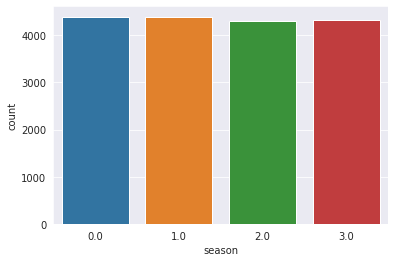

In [ ]:
# season

sns.countplot(x='season', data=df);

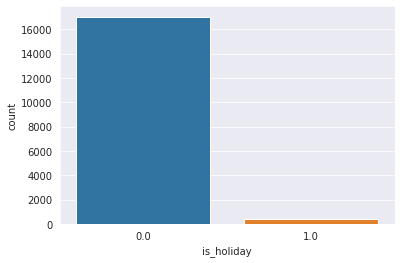

In [ ]:
# is_holiday
sns.countplot(x='is_holiday', data=df);

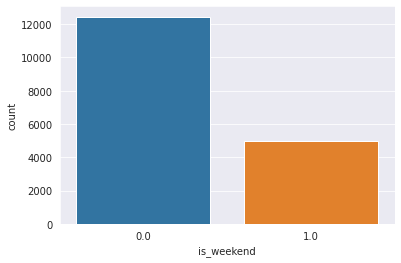

In [ ]:
# is_weekend
sns.countplot(x='is_weekend', data=df);

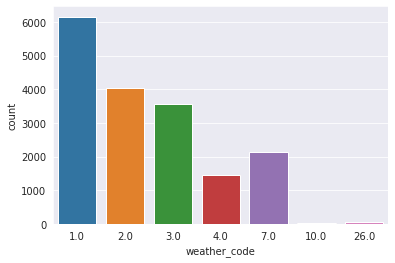

In [ ]:
# weather_code
sns.countplot(x='weather_code', data=df);

### 5.Look at the data type of each variable, transform `timestamp` in type, and set it as index.

In [25]:
df.timestamp = pd.to_datetime(df.timestamp)

In [27]:
df.set_index('timestamp')

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0


- Tam 2 yillik bir timestamp var. `year, month, day_of_month, day_of_week, hour` bilgilerini alarak feature engineering yapalim

### 6.Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

you can use strftime('%Y-%m') for year_mount

In [31]:
df['year_month'] = df.timestamp.map(lambda x: x.strftime('%Y-%m'))

In [34]:
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
year_month      datetime64[ns]
dtype: object

In [33]:
df['year_month'] = pd.to_datetime(df['year_month'])

In [ ]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4


In [35]:
df['year'] = df['timestamp'].dt.year

In [38]:
df['month'] = df['timestamp'].dt.month
df['day_of_month'] = df['timestamp'].dt.day
df['day_of_week'] = df['timestamp'].dt.weekday
df['hour'] = df['timestamp'].dt.hour
df.head(2)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01-01,2015,1,4,6,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01-01,2015,1,4,6,1


In [39]:
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
year_month      datetime64[ns]
year                     int64
month                    int64
day_of_month             int64
day_of_week              int64
hour                     int64
dtype: object

### 7.Visualize the correlation with a heatmap

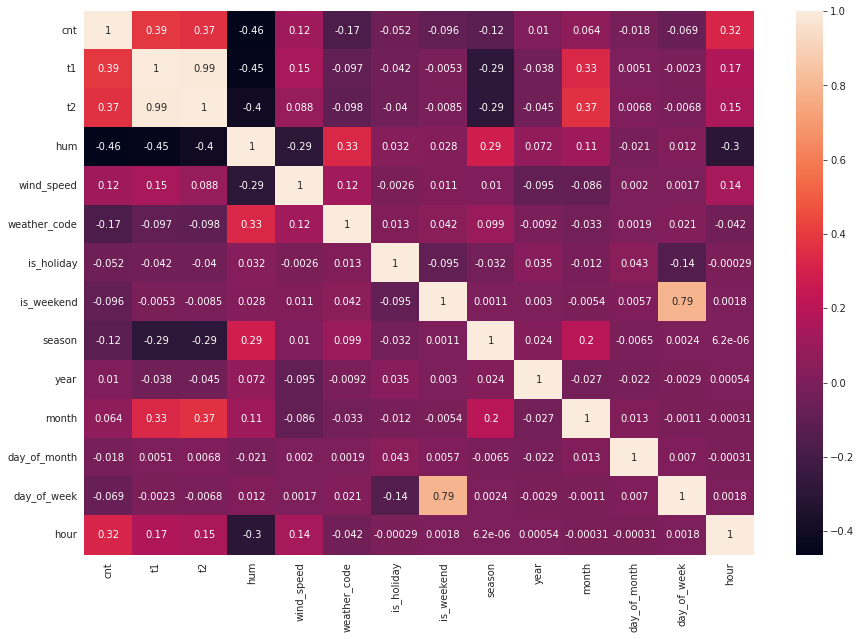

In [83]:
plt.figure(figsize=(15,10))

sns.heatmap(df.corr(), annot=True);

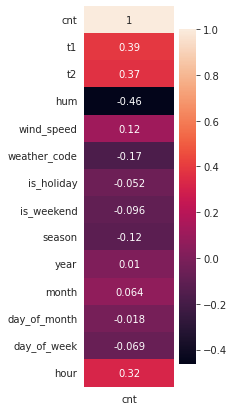

In [87]:
# for the target variable
plt.figure(figsize=(2,7))
sns.heatmap(df.corr()[['cnt']],annot=True);

### 8. Visualize the correlation of the target variable and the other features with barplot

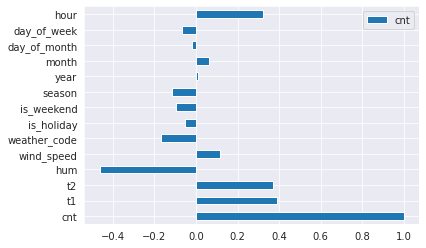

In [50]:
df.corr()[['cnt']].plot(kind='barh')

In [45]:
df.plot.bar(x= df.corr()['cnt'].index,
y=df.corr()['cnt'].values)

ValueError: ignored

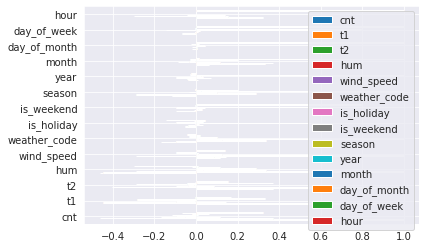

In [51]:
df.corr().plot(kind='barh')

In [52]:
df.plot(kind='barh')

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f285c489830> (for post_execute):


ValueError: ignored

ValueError: ignored

In [53]:
df['cnt'].plot(kind='barh')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f285c489830> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f285c48f320> (for post_execute):


KeyboardInterrupt: ignored

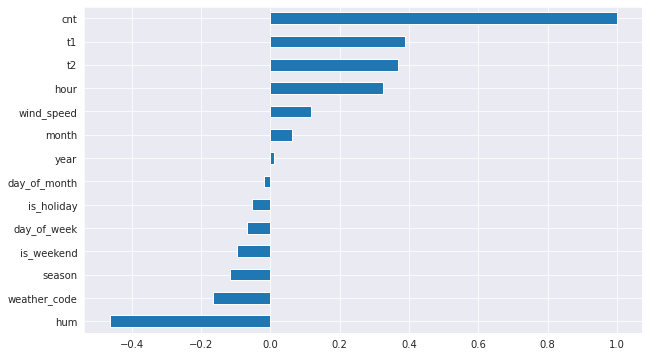

In [ ]:
#with pandas


### 9.Plot bike shares over time use lineplot

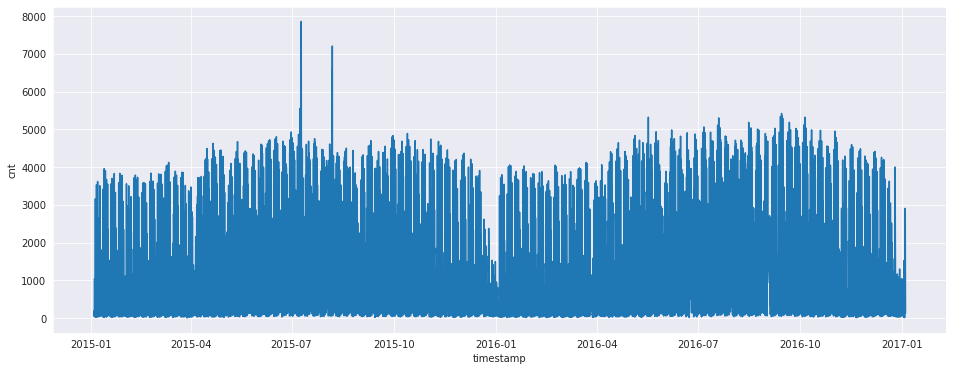

In [54]:
plt.figure(figsize=(16,6))

sns.lineplot(x="timestamp", y="cnt", data=df);

### 10.Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)

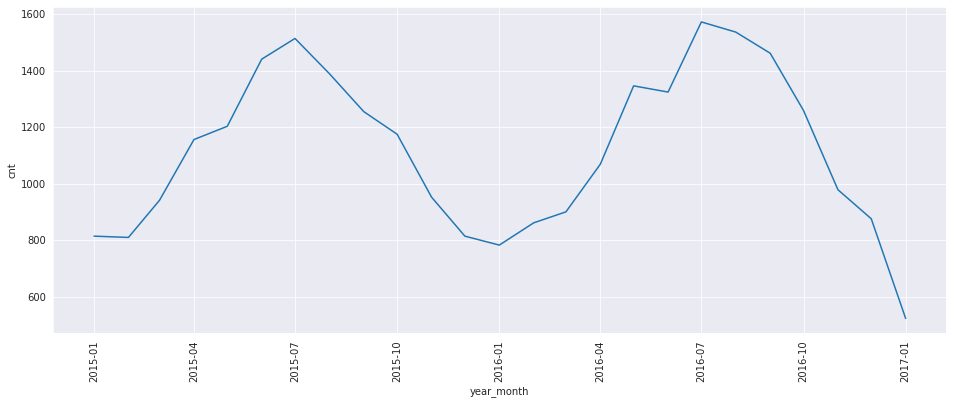

In [58]:
plt.figure(figsize=(16,6))

plt.xticks(rotation=90)

sns.lineplot(x="year_month", y="cnt", data=df, ci=None);

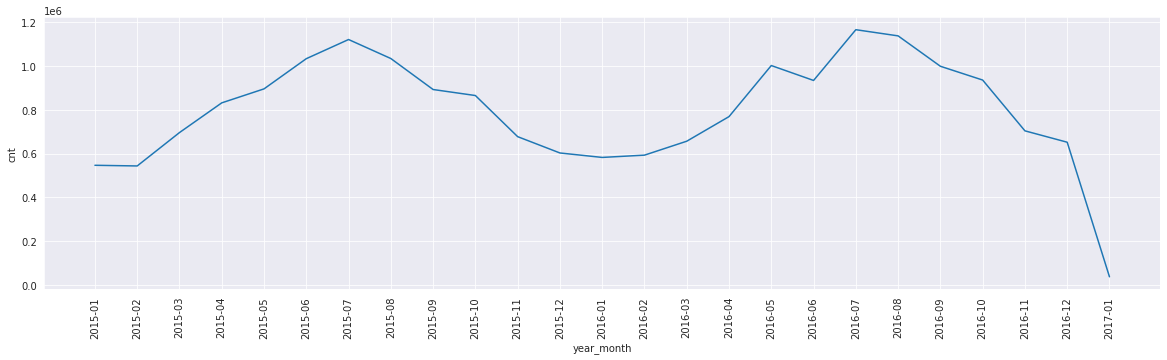

In [ ]:
# with lineplot


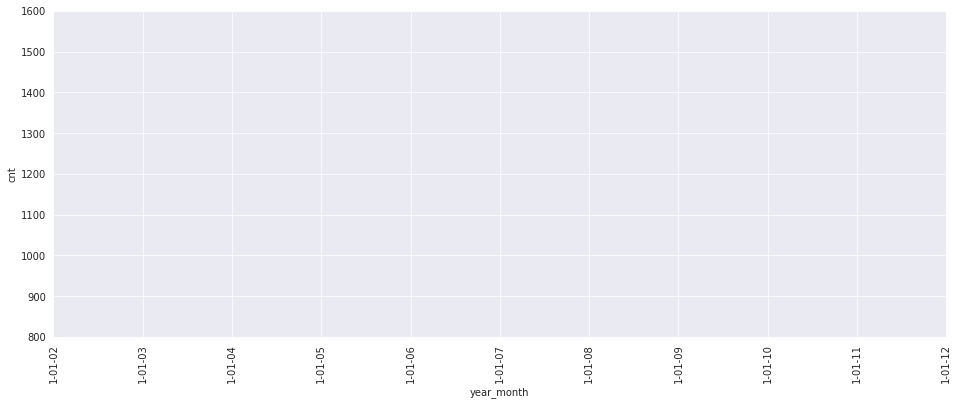

In [65]:
plt.figure(figsize=(16,6))

plt.xticks(rotation=90,)

sns.lineplot(x="year_month", y="cnt", data=df, ci=None);

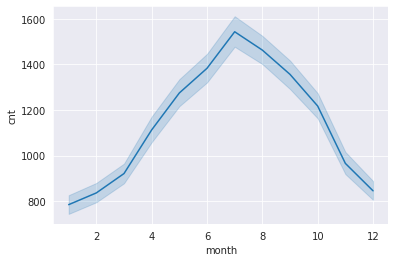

In [66]:
# with lineplot
sns.lineplot(x="month", y="cnt", data=df);

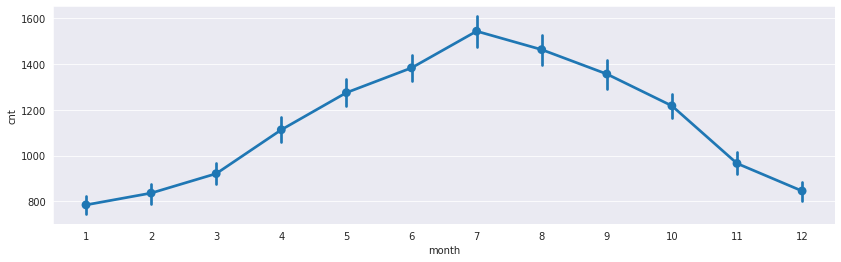

In [70]:
plt.figure(figsize=(14,4))
sns.pointplot(x="month", y="cnt", data=df);

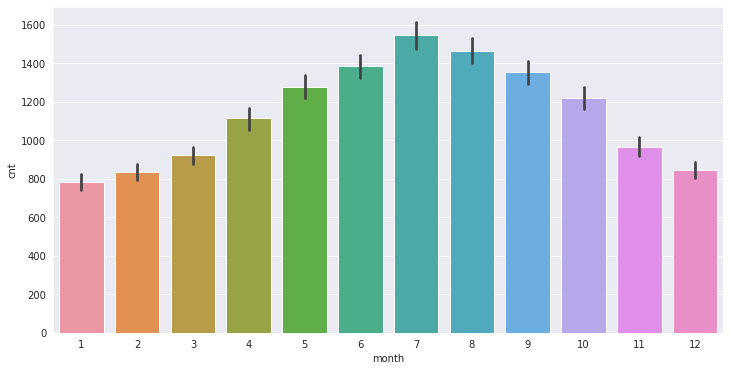

In [90]:
plt.figure(figsize=(12,6))
sns.barplot(x="month", y="cnt", data=df);

### 11.Plot bike shares by hours on (holidays, weekend, season)

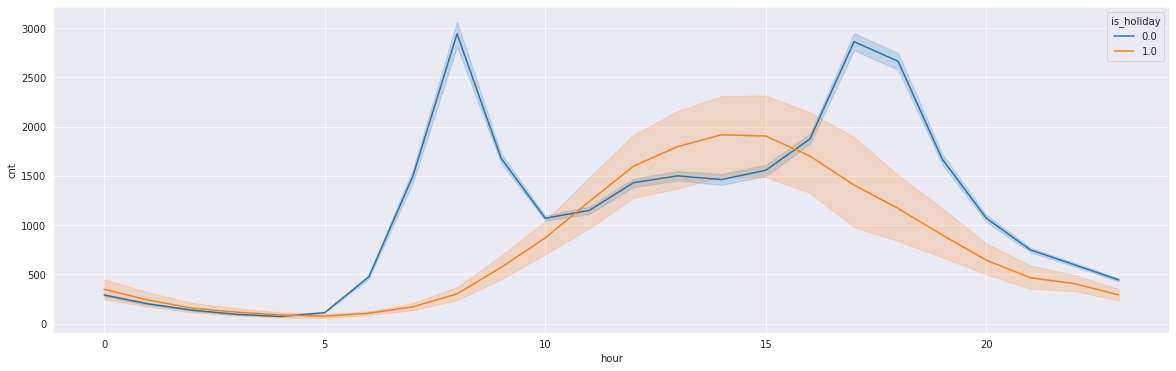

In [74]:
plt.figure(figsize=(20,6))

sns.lineplot(x="hour", y="cnt", data=df, hue='is_holiday');

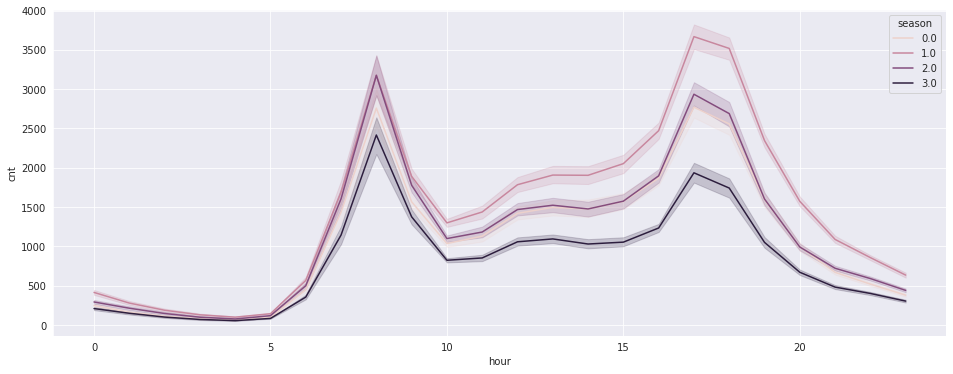

In [75]:
# with lineplot (*You may want to see seasonal breakdowns*)
plt.figure(figsize=(16,6))

sns.lineplot(x="hour", y="cnt", data=df, hue='season');

<Figure size 1440x432 with 0 Axes>

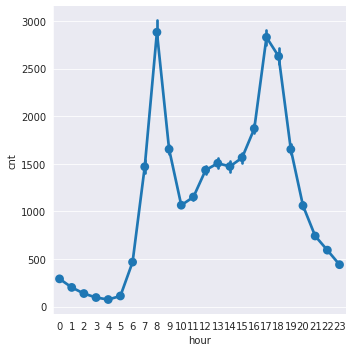

In [78]:
plt.figure(figsize=(20,6))
sns.catplot(x='hour', y='cnt', data=df, kind='point')

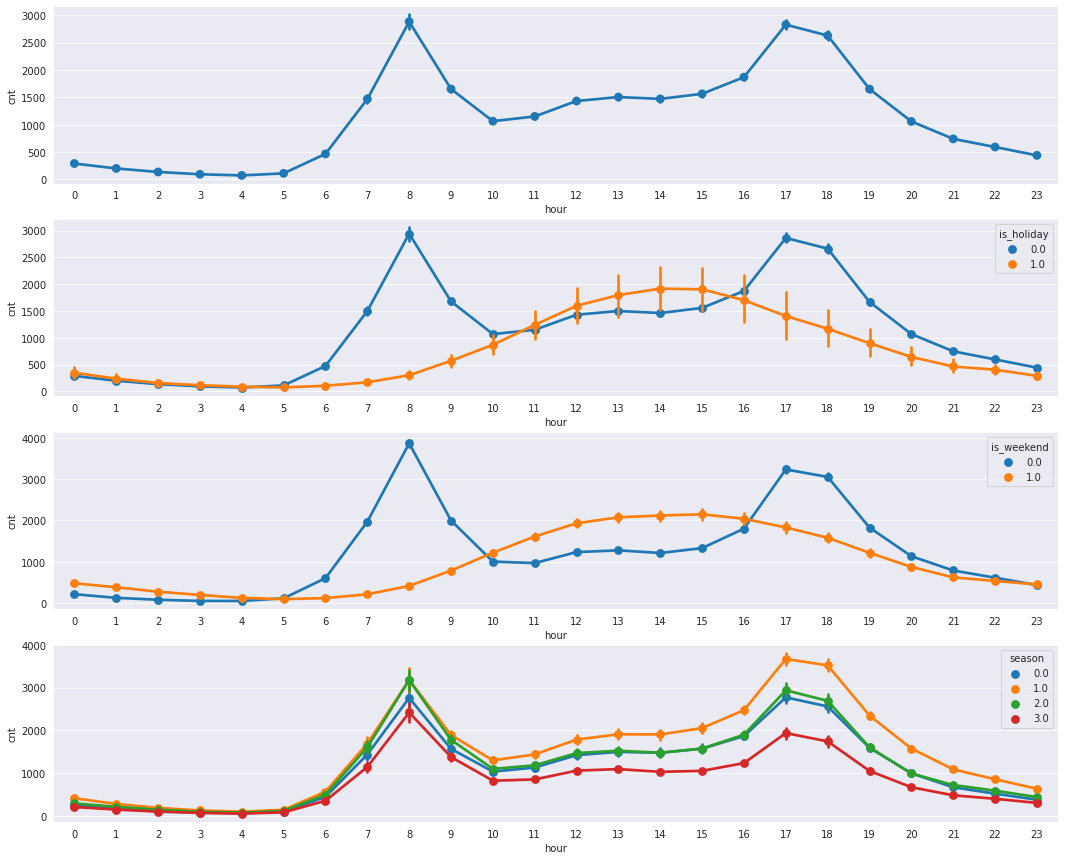

In [ ]:
# with pointplot


### 12.Plot bike shares by day of week
- You may want to see whether it is a holiday or not

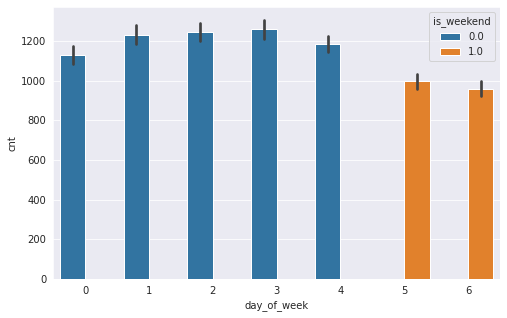

In [93]:
plt.figure(figsize=(8,5))
sns.barplot(x="day_of_week", y="cnt", data=df, hue='is_weekend');

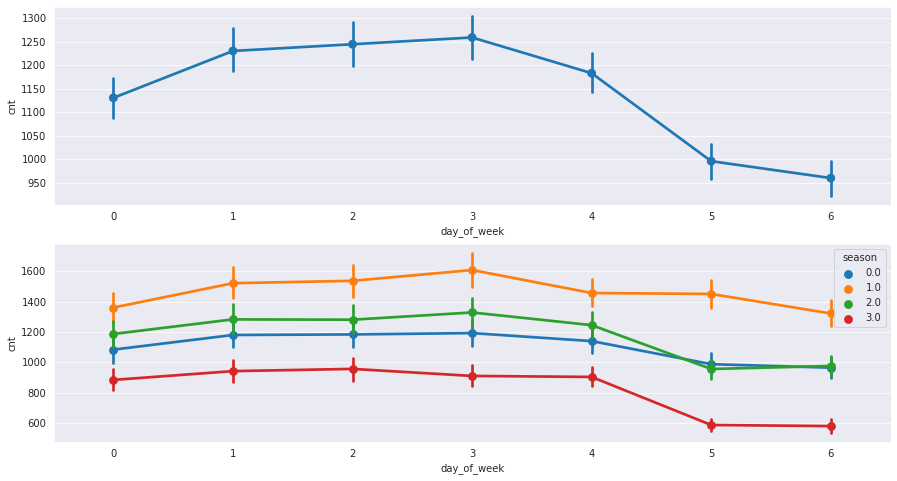

In [ ]:
# with pointplot


<Figure size 1296x648 with 0 Axes>

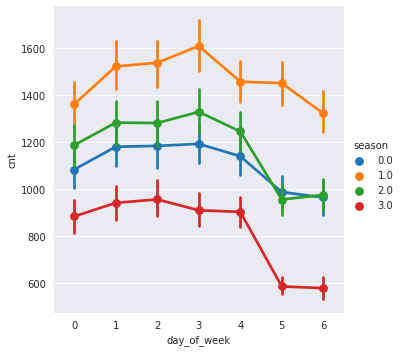

In [96]:
plt.figure(figsize=(18,9))
sns.catplot(x='day_of_week', y='cnt', data=df, kind='point', hue='season')

### 13.Plot bike shares by day of month

day_of_month,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1128,1144,1141,1211,1194,1223,1261,1157,1204,1167,1139,1124,1176,1141,1182,1179,1153,1116,1126,1128,1174,1054,1191,1082,1131,1063,1080,1156,968


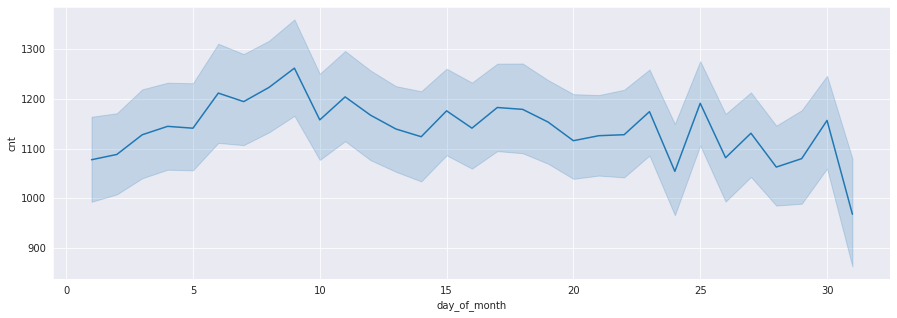

In [ ]:
#with lineplot



### 14.Plot bike shares by year
### Plot bike shares on holidays by seasons

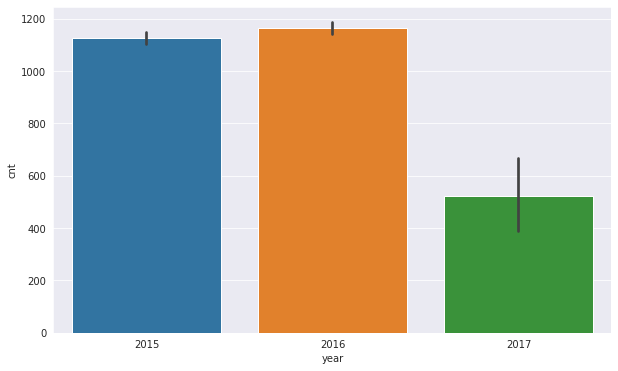

In [ ]:
# with barplot


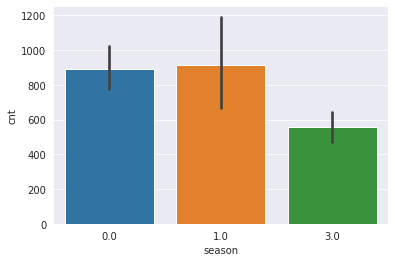

In [ ]:
# with barplot

### 15.Visualize the distribution of bike shares by weekday/weekend with piechart and barplot

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

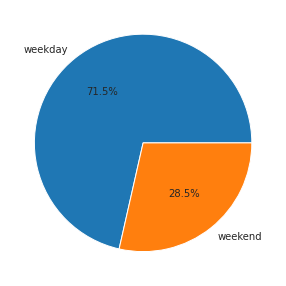

In [ ]:
# pie chart

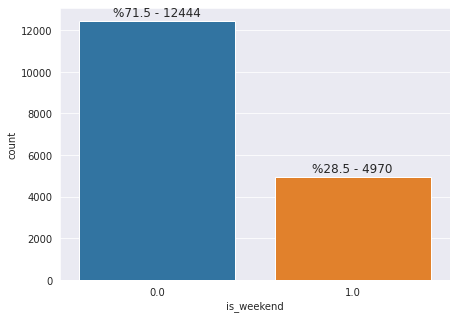

In [ ]:
# with countplot



### 16.Plot the distribution of weather code by seasons

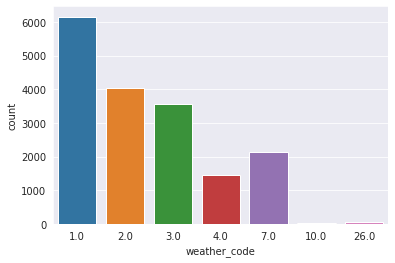

In [ ]:
# with countplot


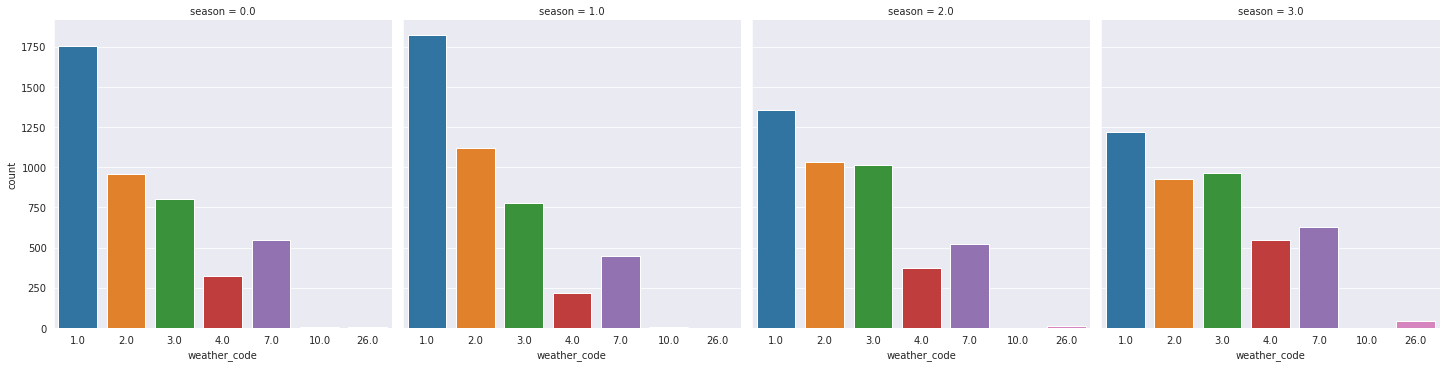

In [ ]:
# with catplot


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___